# Exploratory Data Analysis

In [98]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("../data/processed/cleaned_data.csv")

In [100]:
df.sort_values(by = "Fiyat").head()

,Net_Metrekare,Brüt_Metrekare,Oda_Sayısı,Bulunduğu_Kat,Eşya_Durumu,Binanın_Yaşı,Isıtma_Tipi,Fiyat,Şehir,Binanın_Kat_Sayısı,Kullanım_Durumu,Yatırıma_Uygunluk,Takas,Banyo_Sayısı
10458,145.0,150.0,4.0,Düz Giriş (Zemin),Boş,11-15,Merkezi Doğalgaz,13.825462,erzurum,6.0,Mülk Sahibi Oturuyor,Uygun,Var,2.0
10706,60.0,65.0,2.0,2.Kat,Eşyalı,5-10,Kombi Doğalgaz,13.830400,eskisehir,3.0,Kiracı Oturuyor,Uygun,Var,1.0
8682,130.0,135.0,4.0,Çatı Katı,Boş,21 Ve Üzeri,Kombi Doğalgaz,13.830400,diyarbakir,7.0,Boş,Bilinmiyor,Yok,1.0
14470,130.0,140.0,4.0,3.Kat,Boş,5-10,Kombi Doğalgaz,13.835314,kars,5.0,Boş,Bilinmiyor,Yok,1.0
14521,105.0,120.0,3.0,3.Kat,Boş,4,Kombi Doğalgaz,13.835314,kars,5.0,Mülk Sahibi Oturuyor,Bilinmiyor,Yok,1.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17221 entries, 0 to 17220
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Net_Metrekare       17221 non-null  float64
 1   Brüt_Metrekare      17221 non-null  float64
 2   Oda_Sayısı          17221 non-null  float64
 3   Bulunduğu_Kat       17221 non-null  object 
 4   Eşya_Durumu         17221 non-null  object 
 5   Binanın_Yaşı        17221 non-null  object 
 6   Isıtma_Tipi         17221 non-null  object 
 7   Fiyat               17221 non-null  float64
 8   Şehir               17221 non-null  object 
 9   Binanın_Kat_Sayısı  17221 non-null  float64
 10  Kullanım_Durumu     17221 non-null  object 
 11  Yatırıma_Uygunluk   17221 non-null  object 
 12  Takas               17221 non-null  object 
 13  Banyo_Sayısı        17221 non-null  float64
dtypes: float64(6), object(8)
memory usage: 1.8+ MB


In [102]:
categorical_columns = ["Bulunduğu_Kat","Eşya_Durumu","Binanın_Yaşı","Isıtma_Tipi","Şehir","Kullanım_Durumu","Yatırıma_Uygunluk","Takas"]
for col in categorical_columns: 
    print(f"{col} categories : {df[col].nunique()}\n")

Bulunduğu_Kat categories : 37

Eşya_Durumu categories : 2

Binanın_Yaşı categories : 9

Isıtma_Tipi categories : 13

Şehir categories : 53

Kullanım_Durumu categories : 3

Yatırıma_Uygunluk categories : 2

Takas categories : 2



     Some of the features are of object type, but we can use binary encoding for them because each feature contains only two categories.I'll use binary encoding on them so I can use them on my graphs and correlation matrix.

In [103]:
df["Eşya_Durumu"] = df["Eşya_Durumu"].map({'Eşyalı' : 1 , 'Boş' : 0})
df["Yatırıma_Uygunluk"] = df["Yatırıma_Uygunluk"].map({'Uygun' : 1  , 'Bilinmiyor' : 0})
df["Takas"] = df["Takas"].map({'Var': 1, 'Yok': 0 })

## Heatmap Analysis

<Axes: >

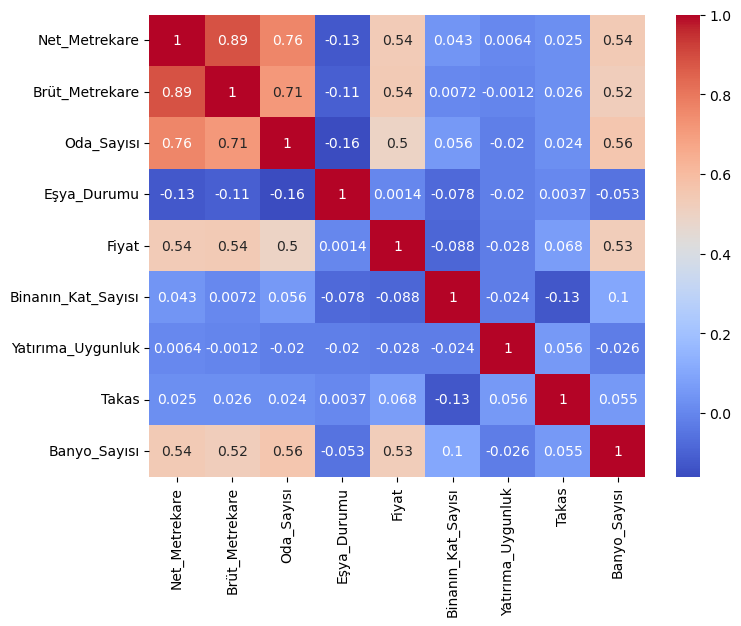

In [104]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

 *Our target variable has positive linear correlation with net area , gross area, number of rooms and number of bathroom which really makes sense.*
 
 *There is a strong negative correlation between oda_sayısı and eşya_durumu. This means that as the number of rooms decreases, the likelihood of the house being furnished increases.*
 
 *The relationship between net and gross area is expected.As gross area increases, net area usually increases.*

## Distrubution of Sale Price

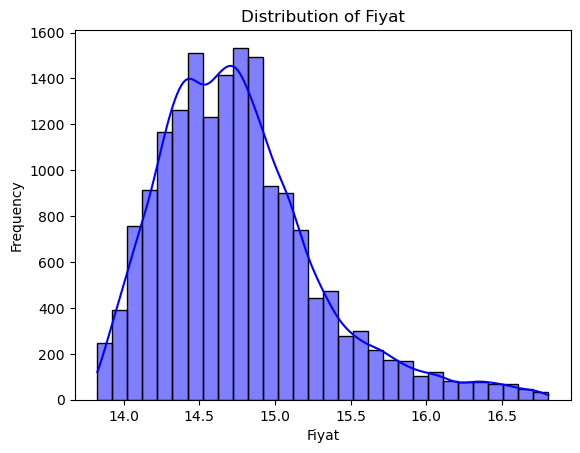

In [105]:
# Histogram with Kernel Density Estimate (KDE) line
sns.histplot(df['Fiyat'], kde=True, color='blue', bins=30)

plt.title('Distribution of Fiyat')
plt.xlabel('Fiyat')
plt.ylabel('Frequency')
plt.show()

In [106]:
df['Fiyat'].skew()

np.float64(1.0211577158213476)

    The data is highly right-skewed (positively skewed), which you can see from the long tail extending to the right.

## Scatter Plots Analysis

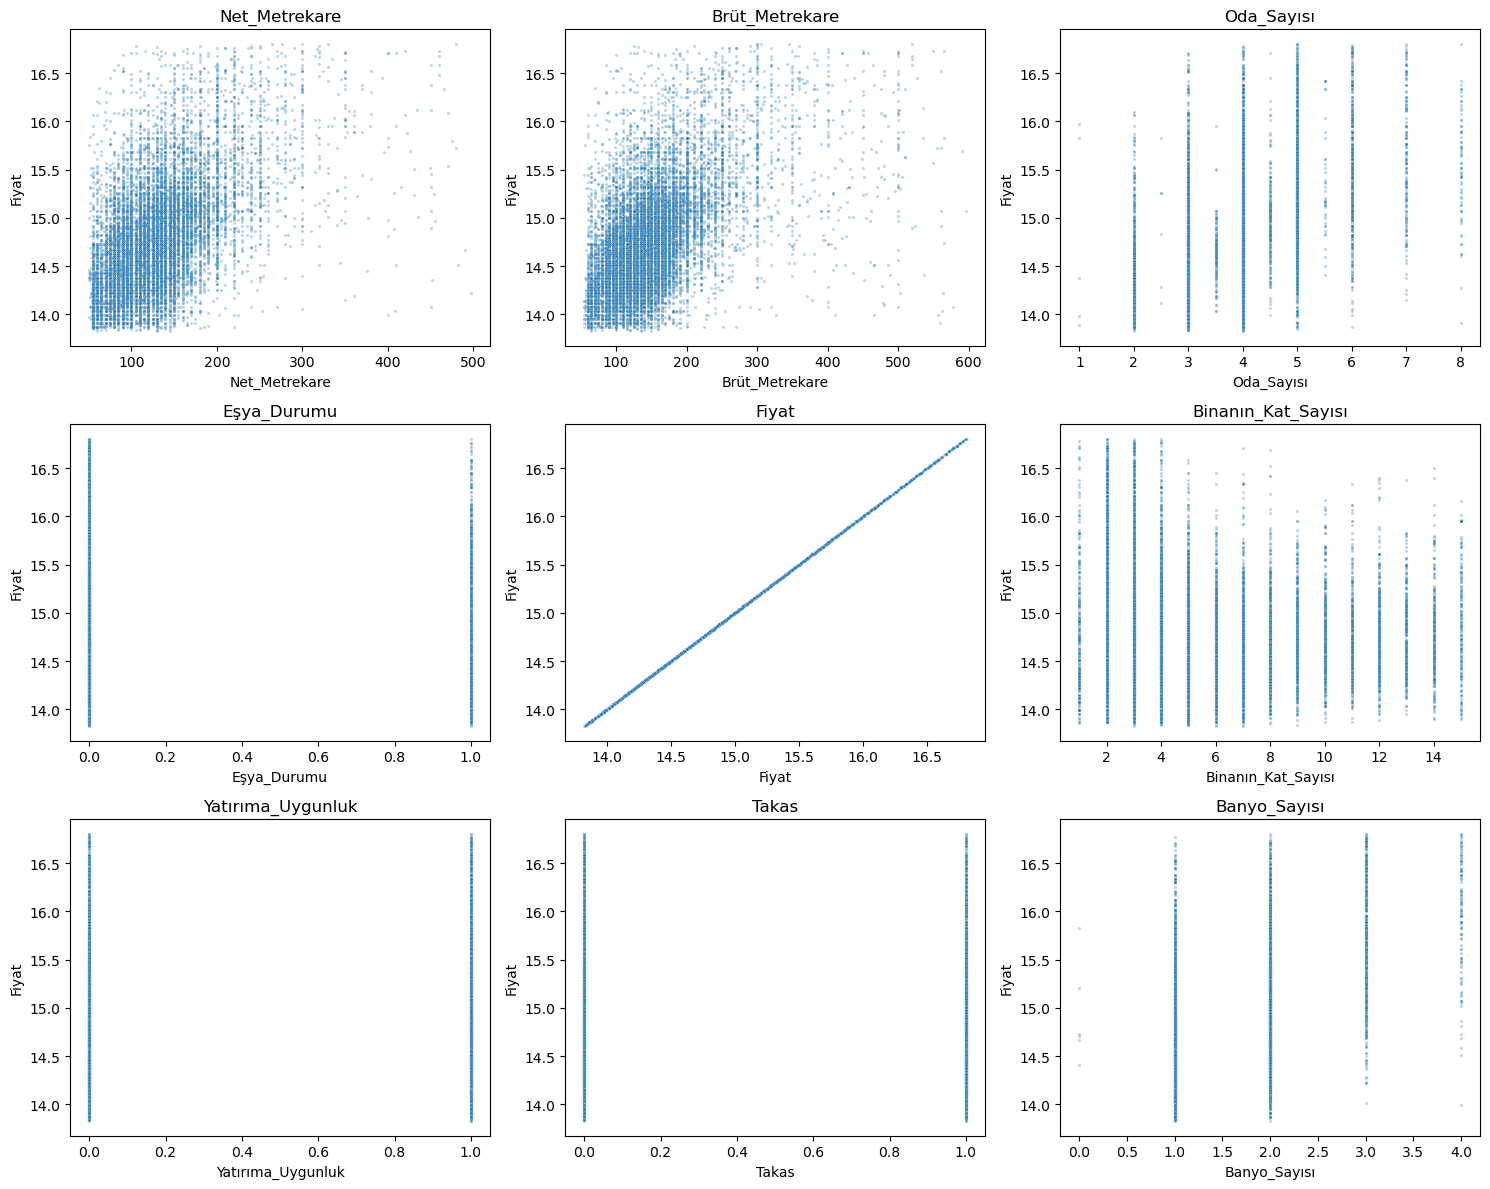

In [107]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_df.columns , 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y=numeric_df["Fiyat"], s=5, alpha = 0.3)
    plt.title(col)

plt.tight_layout()
plt.show()


## Pairplot Analysis

<Figure size 2000x3000 with 0 Axes>

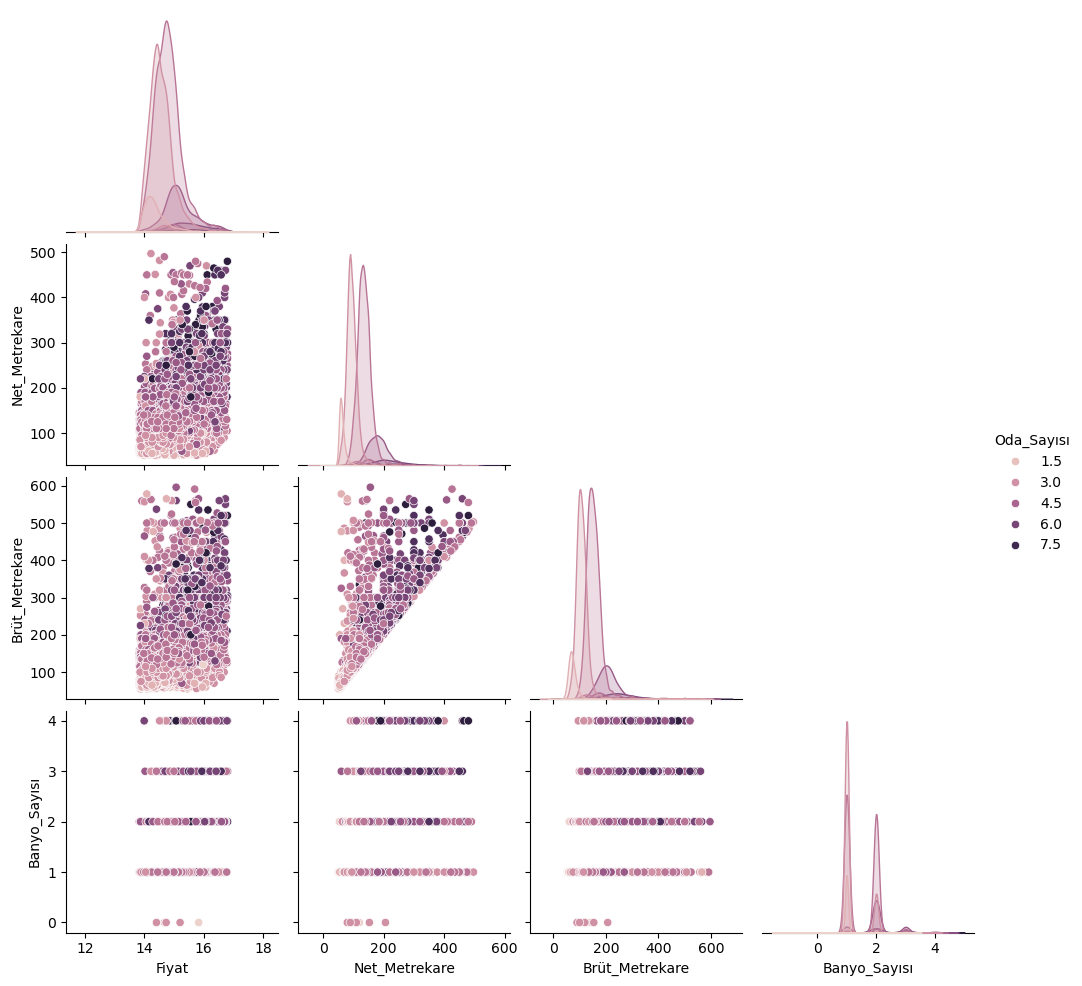

In [108]:
plt.figure(figsize =(20,30))
pairplot_features = [
    "Fiyat",          
    "Net_Metrekare",
    "Brüt_Metrekare",
    "Oda_Sayısı",
    "Banyo_Sayısı",
]

sns.pairplot(df[pairplot_features], diag_kind="kde", corner=True, hue = "Oda_Sayısı")
plt.show()


     Net and gross square meters have an extremely strong linear relationship. As the gross area increases, the net usable space increases proportionally, with only a few noticeable outliers.That creates multicolunarity. Net and Gross meters are almost identical. So we can remove on of them.
    
    Price generally increases with property size, but the wide spread shows that other factors—like location or building features—also influence cost. Some small homes are expensive, and some large ones are cheaper.

    Room count is a very strong indicator of both size and price. Houses with more rooms consistently appear in the larger and more expensive range of the plots.

    Homes with more bathrooms tend to have higher prices and larger square meter values.

In [109]:
df = df.drop("Brüt_Metrekare" , axis = 1)

## CountPlots

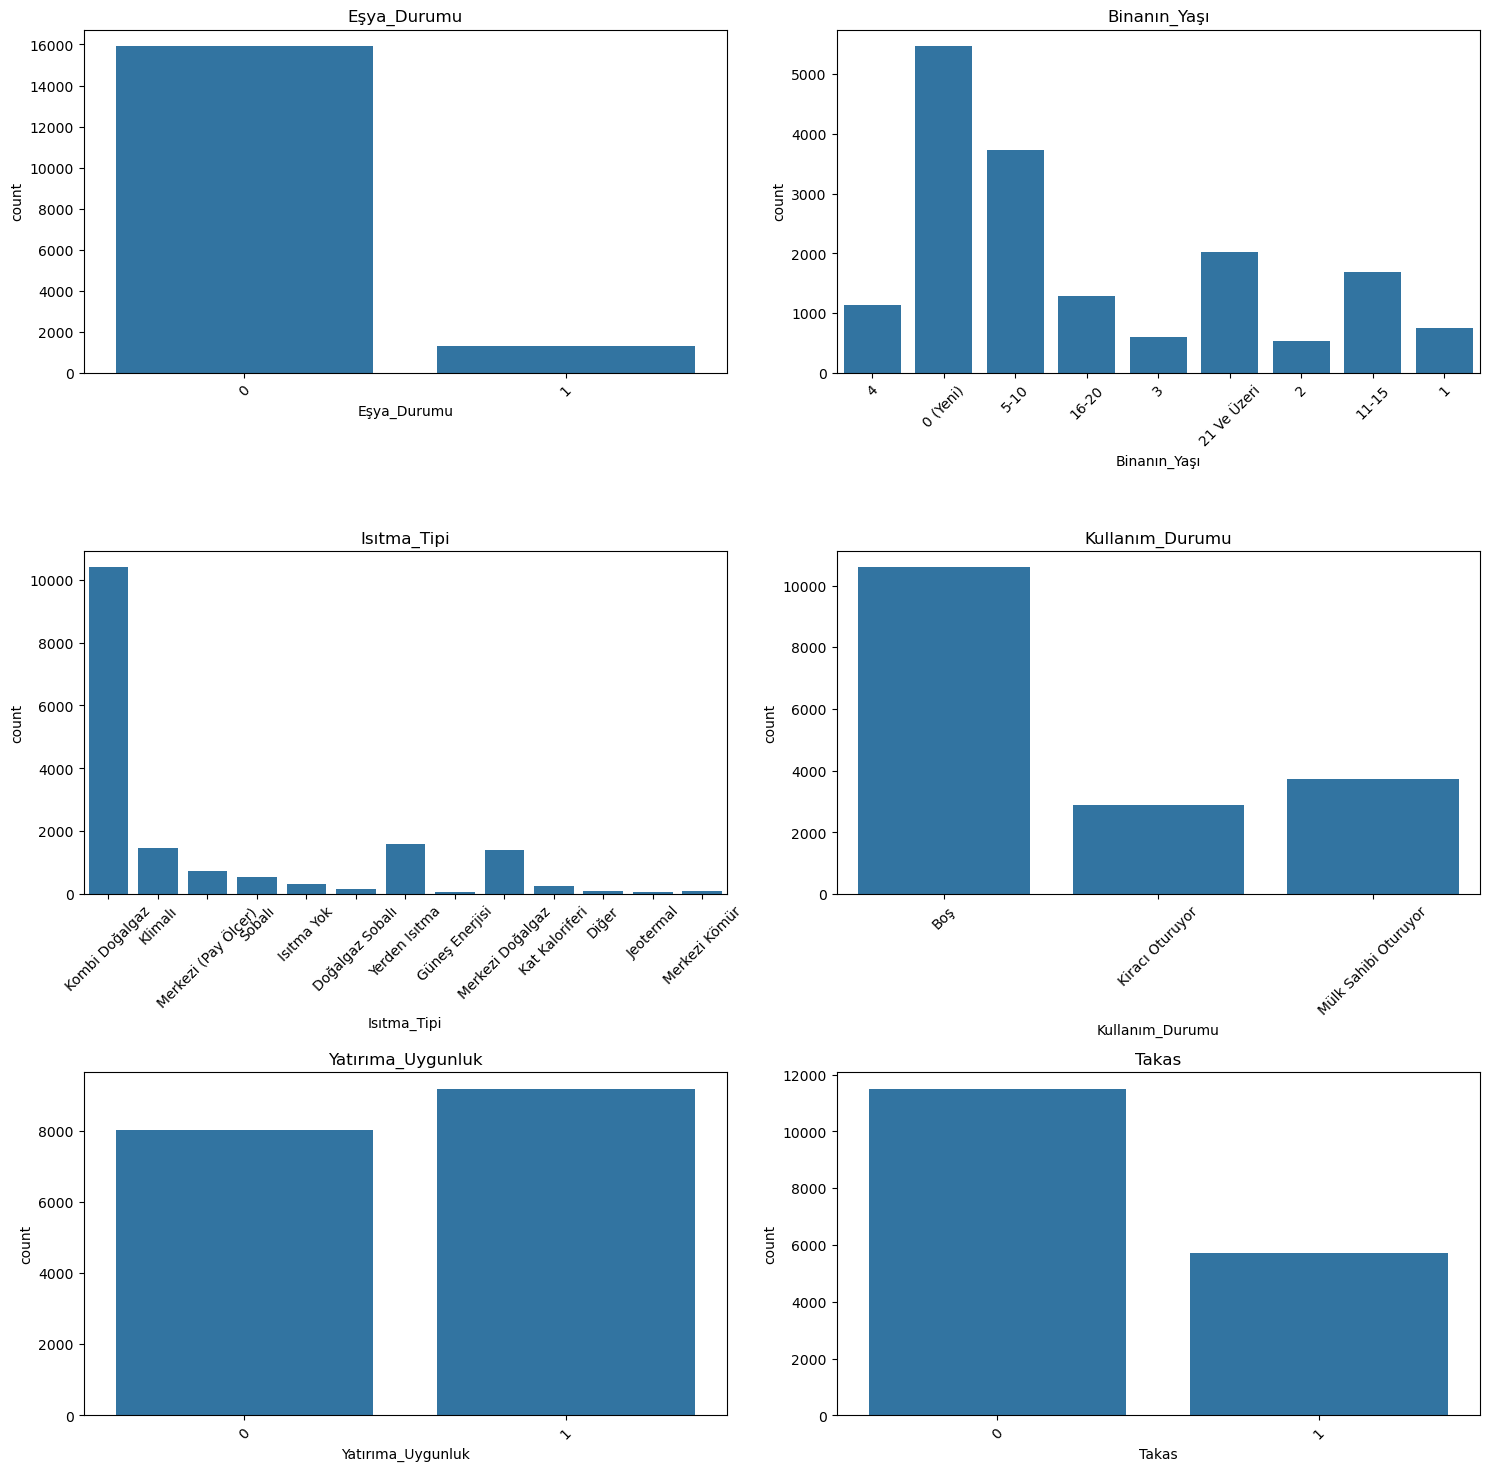

In [110]:
plt.figure(figsize=(15, 30))

cols_to_plot = [col for col in categorical_columns if col not in ["Bulunduğu_Kat", "Şehir"]]

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot) , 2, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

    Several features show strong class imbalance. Eşya_Durumu is almost entirely “Unfurnished" that limits the usefullness of the feature.

    Isıtma_Tipi also contains many very rare categories. We can grouping these into an “Other” category will reduce noise and simplify encoding.

    Yatırıma_Uygunluk is one of the few balanced features, making it more informative for the model.

    For preprocessing, converting building age to ordinal form and grouping rare heating types can be useful.

### Grouping Isıtma_Tipi and Binanın_Yaşı

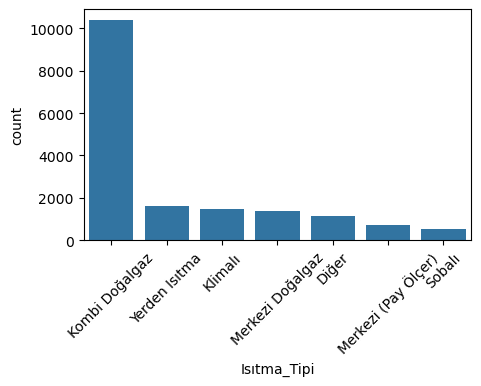

In [111]:
counts = df['Isıtma_Tipi'].value_counts()
threshold = 500
small_categories = counts[counts < threshold].index

df.loc[df['Isıtma_Tipi'].isin(small_categories), 'Isıtma_Tipi'] = 'Diğer'

plt.figure(figsize=(5 , 3))
sns.countplot(data=df, x='Isıtma_Tipi', order=df['Isıtma_Tipi'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [112]:
onetofour = ['1','2','3','4']
df.loc[df['Binanın_Yaşı'].isin(onetofour) , 'Binanın_Yaşı' ] = '1-4'
ordered_categories = ['0 (Yeni)' ,'1-4' ,  '5-10' , '11-15' , '16-20' , '21 Ve Üzeri' ]
oe = OrdinalEncoder(categories =[ordered_categories])
df[['Binanın_Yaşı']] = oe.fit_transform(df[['Binanın_Yaşı']])
print(df['Binanın_Yaşı'].unique())

[1. 0. 2. 4. 5. 3.]


## BoxPlots

### Cities

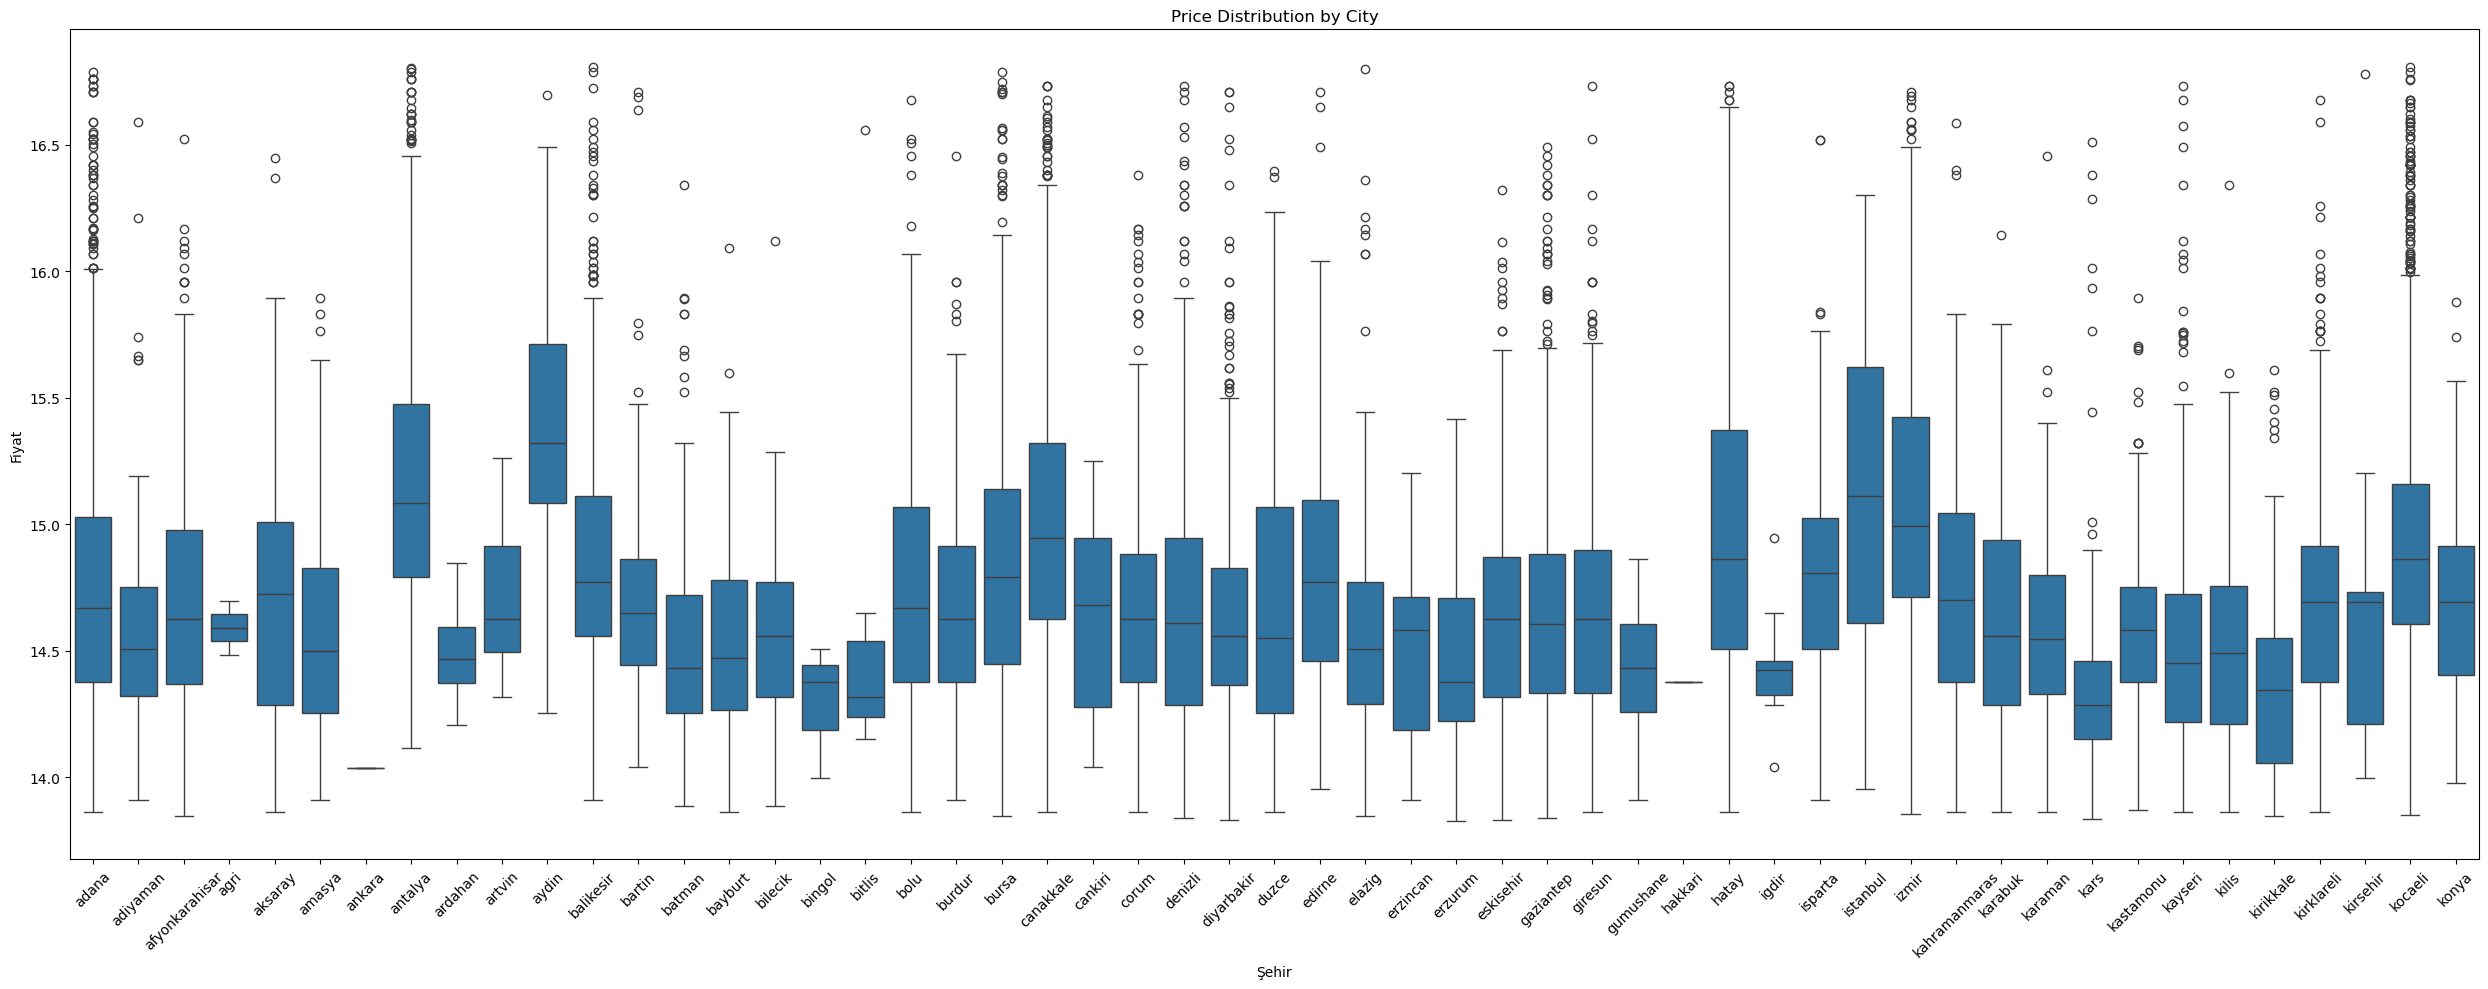

In [113]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Şehir', y='Fiyat', data=df)
plt.title('Price Distribution by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     Housing prices vary strongly by location. Major cities and coastal areas—like İstanbul, Antalya, and İzmir—not only have higher average prices but also a wider price range. This shows a more diverse market with both budget and luxury options, while smaller or eastern cities tend to have more consistent and predictable prices.

### Floor the house is located on

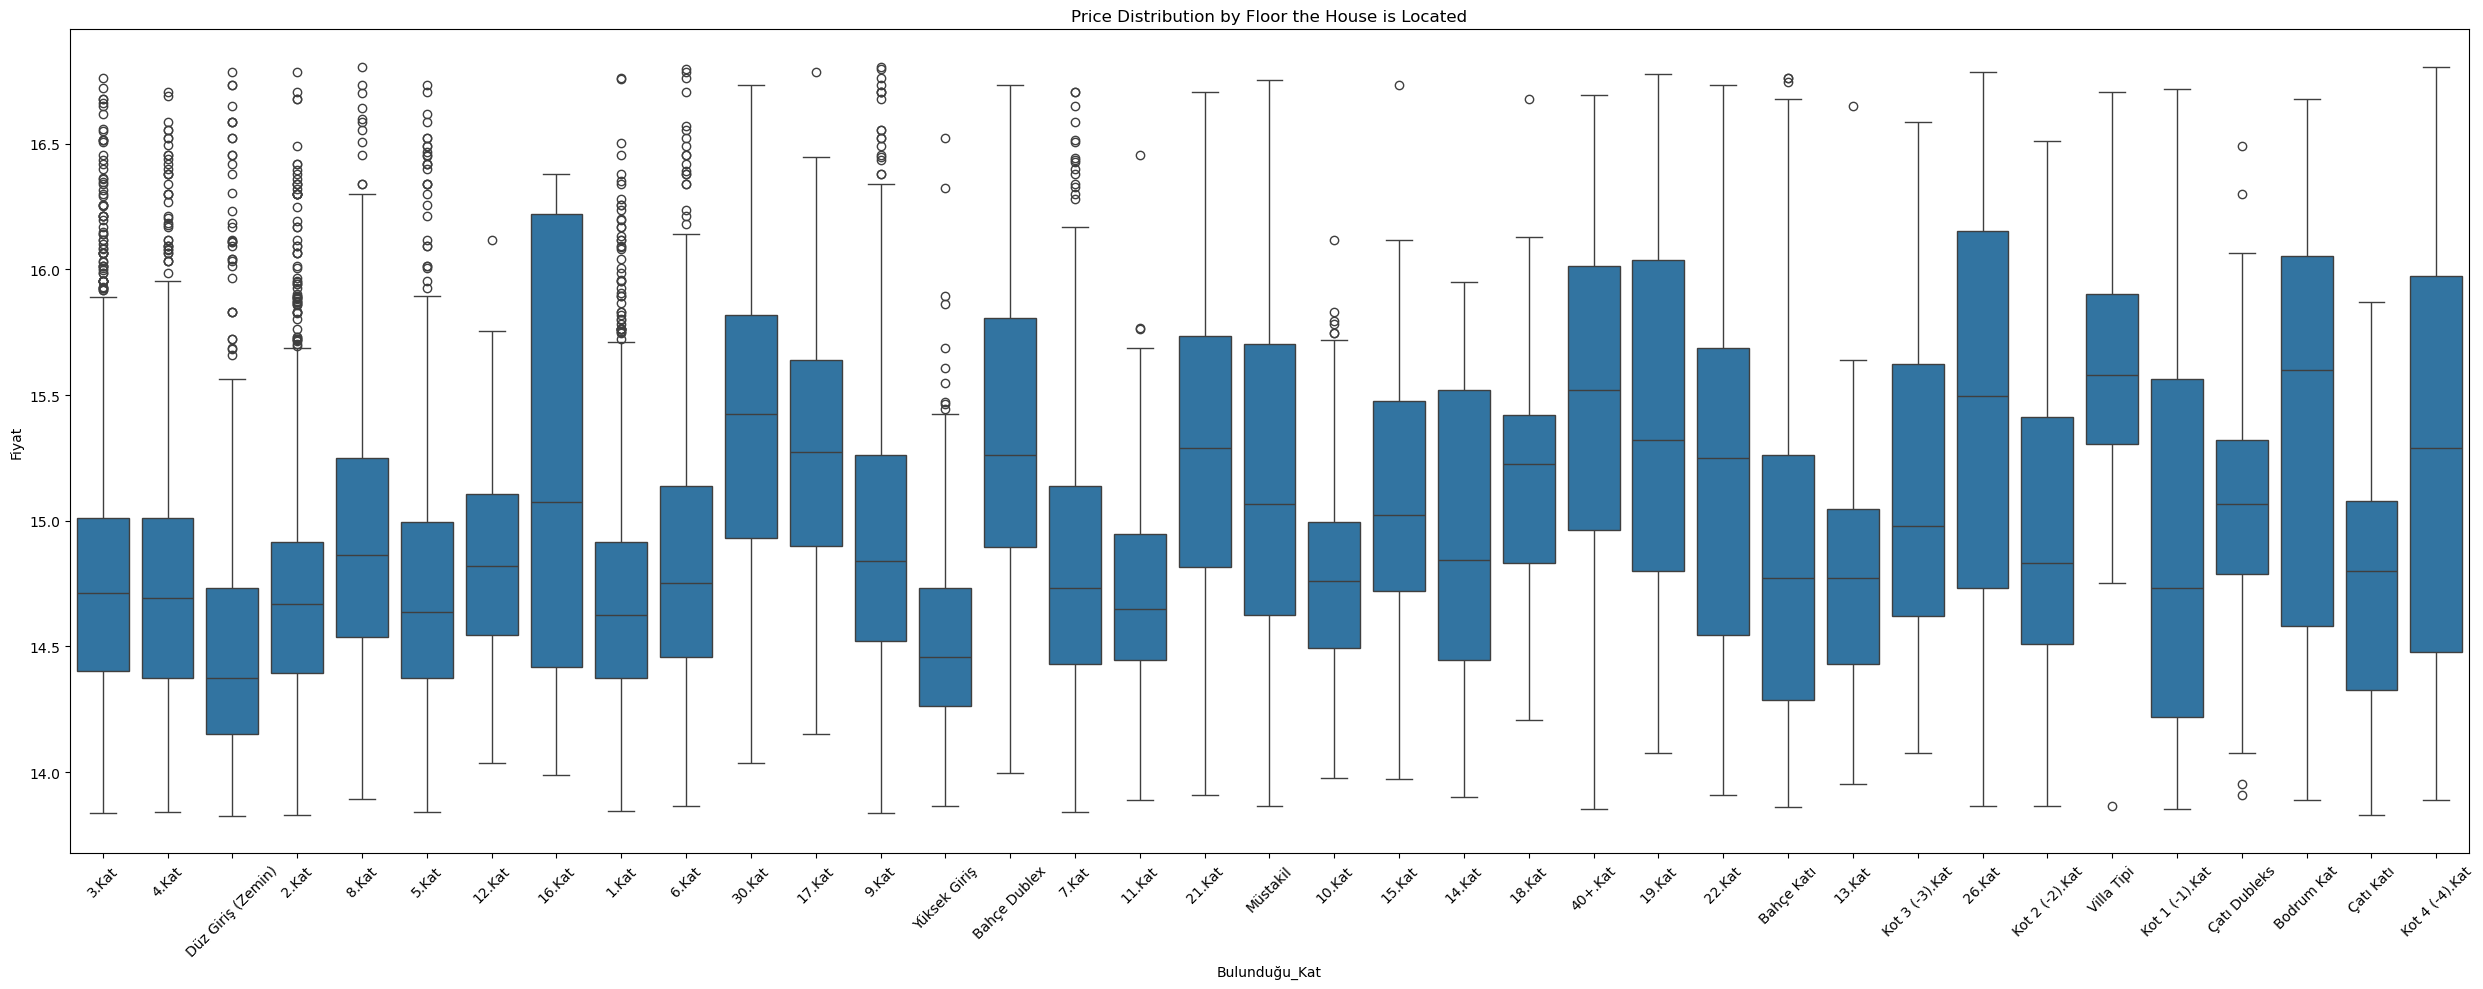

In [114]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Bulunduğu_Kat', y='Fiyat', data=df)
plt.title('Price Distribution by Floor the House is Located')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    There are too many unique floor labels, and grouping them helps reduce unnecessary columns. When we look at the sales prices, it’s clear that the categories naturally fall into five groups: Basement, Ground, Low–Mid Floors, High Floors, and Special Types. Grouping them this way simplifies the feature and keeps the meaningful price patterns intact.

In [115]:
df.to_csv("../data/processed/cleaned_data_after_eda.csv" , index = False)